In [1]:
# Modified from Jimmy Chang's codes

In [2]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.regularizers import l1,l2

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

c:\users\silver\appdata\local\programs\python\python35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
print("training inputs",x_train.shape)
print("training labels",y_train.shape)
print("testing inputs",x_test.shape)
print("testing inputs",y_test.shape)

training inputs (60000, 28, 28)
training labels (60000,)
testing inputs (10000, 28, 28)
testing inputs (10000,)


In [4]:
x_train = x_train.reshape(x_train.shape[0], img_rows*img_cols)
x_test = x_test.reshape(x_test.shape[0], img_rows*img_cols)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [5]:
print("training inputs",x_train.shape)
print("training labels",y_train.shape)
print("testing inputs",x_test.shape)
print("testing inputs",y_test.shape)

training inputs (60000, 784)
training labels (60000, 10)
testing inputs (10000, 784)
testing inputs (10000, 10)


In [6]:
print('Building a model with regularizer L2')
model_l2 = Sequential()
model_l2.add(Dense(512, input_dim=x_train.shape[1], kernel_regularizer=l2(0.005)))
model_l2.add(Activation('relu'))
model_l2.add(Dense(512, kernel_regularizer=l2(0.005)))
model_l2.add(Activation('relu'))
model_l2.add(Dense(10))
model_l2.add(Activation('softmax'))

print('Building a model without regularizer L2')
model_adam = Sequential()
model_adam.add(Dense(512, input_dim=x_train.shape[1]))
model_adam.add(Activation('relu'))
model_adam.add(Dense(512))
model_adam.add(Activation('relu'))
model_adam.add(Dense(10))
model_adam.add(Activation('softmax'))

Building a model with regularizer L2
Building a model without regularizer L2


In [7]:
''' Set up the optimizer '''
from keras.optimizers import SGD, Adam, RMSprop, Adagrad
model_l2.compile(loss= 'categorical_crossentropy',
                 optimizer='Adam',
                 metrics=['accuracy'])

model_adam.compile(loss= 'categorical_crossentropy',
                   optimizer='Adam',
                   metrics=['accuracy'])

''' set the size of mini-batch and number of epochs'''
batch_size = 16
epochs = 30

'''Fit models and use validation_split=0.1 '''
history_l2 = model_l2.fit(x_train, y_train,
                          batch_size=batch_size,
                          epochs=epochs,
                          verbose=1,
                          shuffle=True,
                          validation_split=0.1)

history_adam = model_adam.fit(x_train, y_train,
                              batch_size=batch_size,
                              epochs=epochs,
                              verbose=1,
                              shuffle=True,
                              validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/30
54000/54000 [==============================] - 26s 485us/step - loss: 0.6940 - acc: 0.9092 - val_loss: 0.3955 - val_acc: 0.9433
Epoch 2/30
54000/54000 [==============================] - 24s 448us/step - loss: 0.3802 - acc: 0.9373 - val_loss: 0.3023 - val_acc: 0.9593
Epoch 3/30
54000/54000 [==============================] - 24s 450us/step - loss: 0.3355 - acc: 0.9449 - val_loss: 0.3098 - val_acc: 0.9517
Epoch 4/30
54000/54000 [==============================] - 24s 448us/step - loss: 0.3200 - acc: 0.9473 - val_loss: 0.2610 - val_acc: 0.9648
Epoch 5/30
54000/54000 [==============================] - 24s 449us/step - loss: 0.3094 - acc: 0.9470 - val_loss: 0.2703 - val_acc: 0.9600
Epoch 6/30
54000/54000 [==============================] - 24s 449us/step - loss: 0.3018 - acc: 0.9485 - val_loss: 0.2489 - val_acc: 0.9667
Epoch 7/30
54000/54000 [==============================] - 25s 458us/step - loss: 0.2955 - acc: 0.9497 - val_loss: 0.2

Epoch 29/30
54000/54000 [==============================] - 22s 407us/step - loss: 0.0229 - acc: 0.9963 - val_loss: 0.1585 - val_acc: 0.9833
Epoch 30/30
54000/54000 [==============================] - 22s 410us/step - loss: 0.0250 - acc: 0.9962 - val_loss: 0.1679 - val_acc: 0.9825


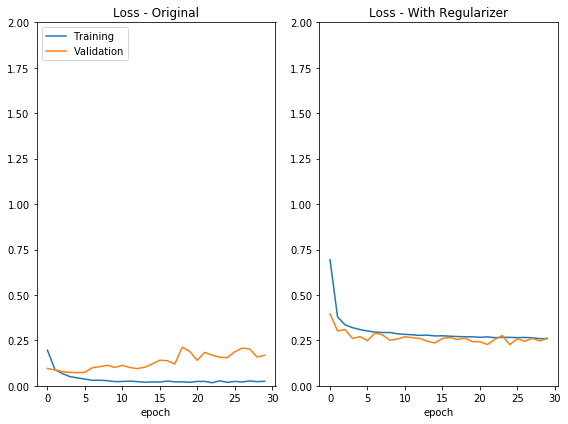

Result saved into 06_regularizer.png


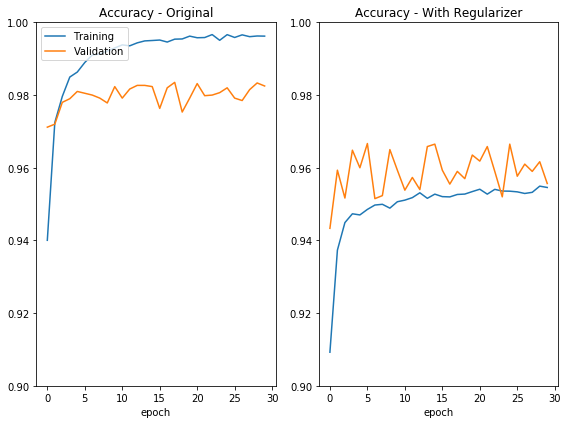

Result saved into 06_regularizer.png


In [8]:
'''Access the loss and accuracy in every epoch'''
loss_l2 = history_l2.history.get('loss')
acc_l2 = history_l2.history.get('acc')
val_loss_l2 = history_l2.history.get('val_loss')
val_acc_l2 = history_l2.history.get('val_acc')
loss_adam = history_adam.history.get('loss')
acc_adam = history_adam.history.get('acc')
val_loss_adam = history_adam.history.get('val_loss')
val_acc_adam = history_adam.history.get('val_acc')

''' Visualize the loss and accuracy of both models'''
import matplotlib.pyplot as plt
plt.figure(0,figsize=(8,6))
plt.subplot(121)
plt.plot(range(len(loss_adam)), loss_adam,label='Training')
plt.plot(range(len(val_loss_adam)), val_loss_adam,label='Validation')
plt.ylim([0,2])
plt.title('Loss - Original')
plt.xlabel("epoch")
plt.legend(loc='upper left')
plt.subplot(122)
plt.plot(range(len(loss_l2)), loss_l2,label='Training')
plt.plot(range(len(val_loss_l2)), val_loss_l2,label='Validation')
plt.ylim([0,2])
plt.title('Loss - With Regularizer')
plt.xlabel("epoch")
plt.tight_layout()
plt.savefig('06_regularizer_loss.png',dpi=300,format='png')
plt.show()
plt.close()
print('Result saved into 06_regularizer.png')

import matplotlib.pyplot as plt
plt.figure(0,figsize=(8,6))
plt.subplot(121)
plt.plot(range(len(acc_adam)), acc_adam,label='Training')
plt.plot(range(len(val_acc_adam)), val_acc_adam,label='Validation')
plt.ylim([0.9,1.00])
plt.title('Accuracy - Original')
plt.xlabel("epoch")
plt.legend(loc='upper left')
plt.subplot(122)
plt.plot(range(len(acc_l2)), acc_l2,label='Training')
plt.plot(range(len(val_acc_l2)), val_acc_l2,label='Validation')
plt.ylim([0.9,1.00])
plt.title('Accuracy - With Regularizer')
plt.xlabel("epoch")
plt.tight_layout()
plt.savefig('06_regularizer_acc.png',dpi=300,format='png')
plt.show()
plt.close()
print('Result saved into 06_regularizer.png')